In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'toscana'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,9,Toscana,2,0,2,0,2,2,2,...,0.0,156.0,0.0,0.0,0.00,100.00,1.28,0.00,0.00,0.00
1,2020-02-26T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,67.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,47.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,9,Toscana,5,0,5,2,7,5,6,...,0.0,27.0,0.0,2.0,0.00,71.43,22.22,0.00,0.00,250.00
4,2020-02-29T17:00:00,9,Toscana,7,0,7,3,10,3,3,...,0.0,94.0,0.0,1.0,0.00,70.00,3.19,0.00,0.00,42.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2021-04-23T17:00:00,9,Toscana,1501,256,1757,21750,23507,-482,1003,...,17.0,26049.0,9301.0,-458.0,14.57,7.47,3.85,10.78,-0.39,-2.01
424,2021-04-24T17:00:00,9,Toscana,1474,255,1729,21318,23047,-460,886,...,26.0,26080.0,8671.0,-432.0,14.75,7.50,3.40,10.22,-0.39,-1.96
425,2021-04-25T17:00:00,9,Toscana,1453,252,1705,21141,22846,-201,955,...,22.0,21970.0,7979.0,-177.0,14.78,7.46,4.35,11.97,-1.18,-0.87
426,2021-04-26T17:00:00,9,Toscana,1466,262,1728,20943,22671,-175,737,...,22.0,11609.0,4260.0,-198.0,15.16,7.62,6.35,17.30,3.97,-0.77


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 522
Nuovi tamponi: 21193.0
Percentuale nuovi positivi/nuovi tamponi: 2.5 %
Nuovi guariti: 1393.0
Nuovi deceduti: 34.0
Variazione positivi ricoverati con sintomi: -17.0
Variazione positivi in terapia intensiva: -5.0
Variazione positivi in isolamento dimiciliare: -883.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-26T17:00:00,9,Toscana,844,163,1007,15876,16883,753,1254,...,22.0,23028.0,11800.0,758.0,16.19,5.96,5.45,10.63,2.52,4.67
1,2021-02-27T17:00:00,9,Toscana,887,166,1053,16376,17429,546,1126,...,20.0,23360.0,12412.0,500.0,15.76,6.04,4.82,9.07,1.84,3.23
2,2021-02-28T17:00:00,9,Toscana,909,168,1077,16972,18049,620,1068,...,13.0,19116.0,11149.0,596.0,15.60,5.97,5.59,9.58,1.20,3.56
3,2021-03-01T17:00:00,9,Toscana,950,172,1122,17343,18465,416,877,...,18.0,12273.0,7198.0,371.0,15.33,6.08,7.15,12.18,2.38,2.30
4,2021-03-02T17:00:00,9,Toscana,989,174,1163,17665,18828,363,1058,...,13.0,23324.0,11566.0,322.0,14.96,6.18,4.54,9.15,1.16,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-23T17:00:00,9,Toscana,1501,256,1757,21750,23507,-482,1003,...,17.0,26049.0,9301.0,-458.0,14.57,7.47,3.85,10.78,-0.39,-2.01
57,2021-04-24T17:00:00,9,Toscana,1474,255,1729,21318,23047,-460,886,...,26.0,26080.0,8671.0,-432.0,14.75,7.50,3.40,10.22,-0.39,-1.96
58,2021-04-25T17:00:00,9,Toscana,1453,252,1705,21141,22846,-201,955,...,22.0,21970.0,7979.0,-177.0,14.78,7.46,4.35,11.97,-1.18,-0.87
59,2021-04-26T17:00:00,9,Toscana,1466,262,1728,20943,22671,-175,737,...,22.0,11609.0,4260.0,-198.0,15.16,7.62,6.35,17.30,3.97,-0.77


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

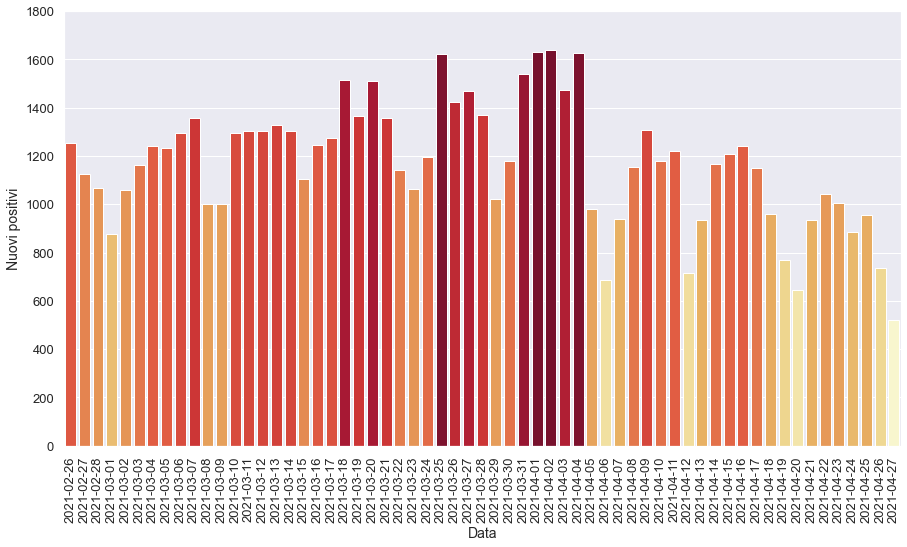

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

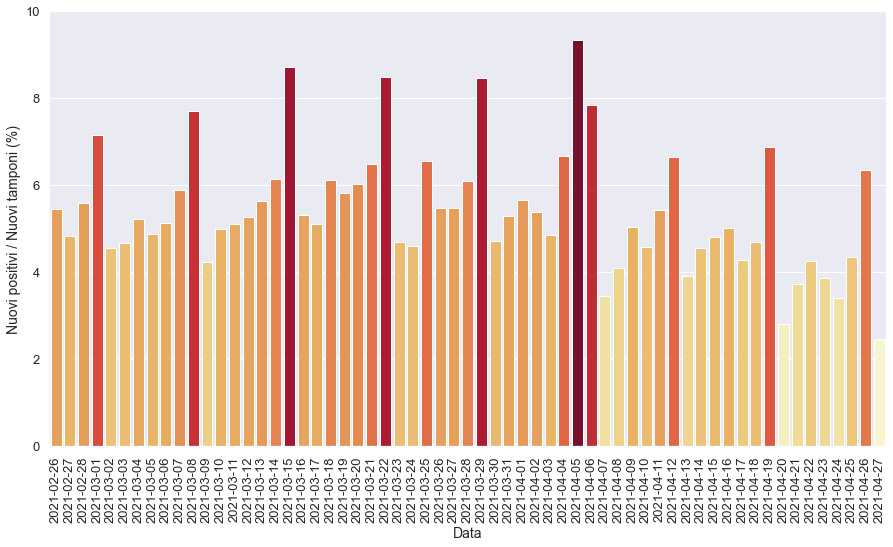

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

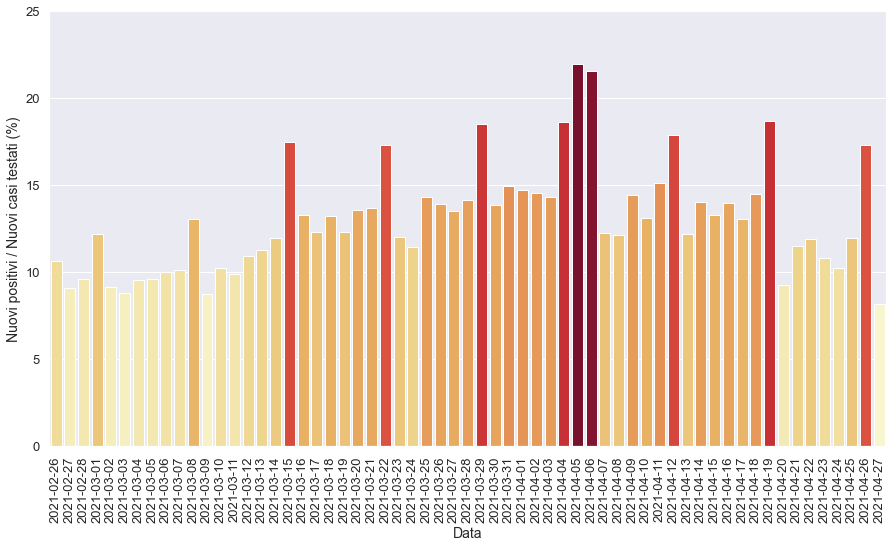

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

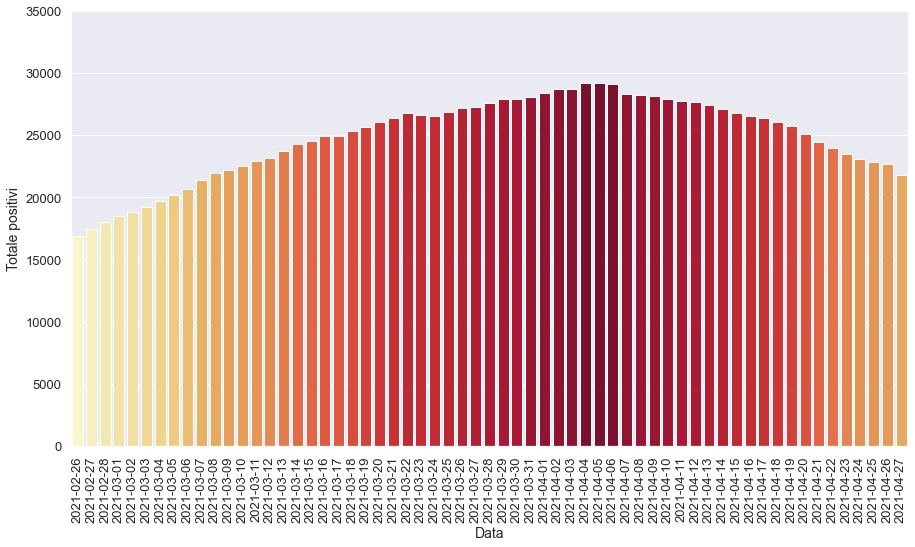

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

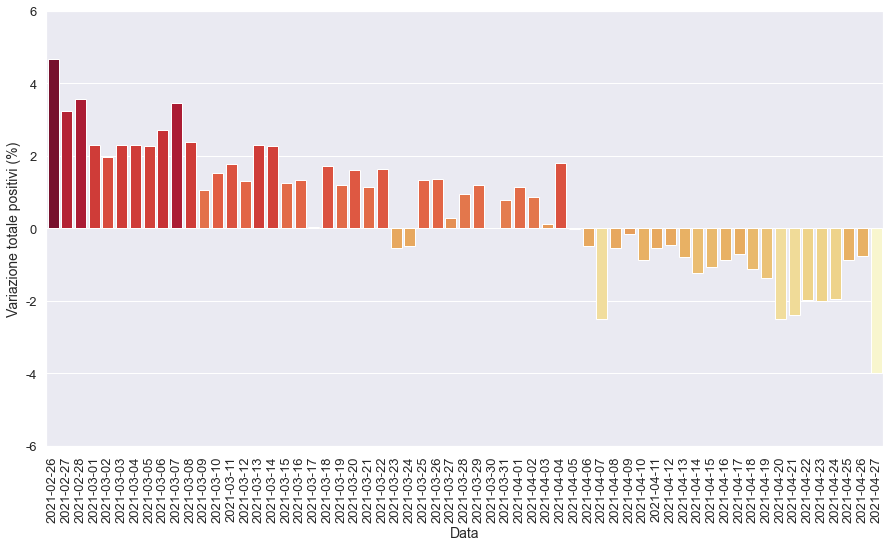

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

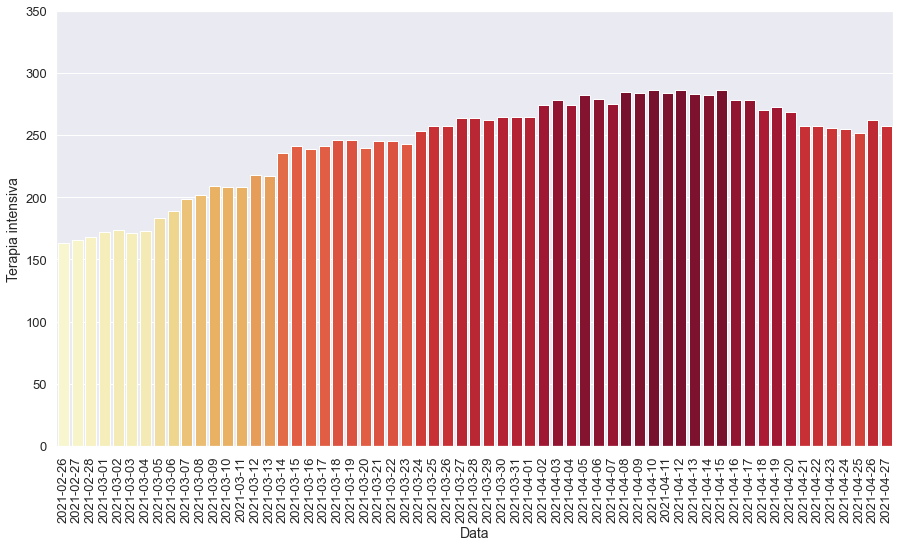

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

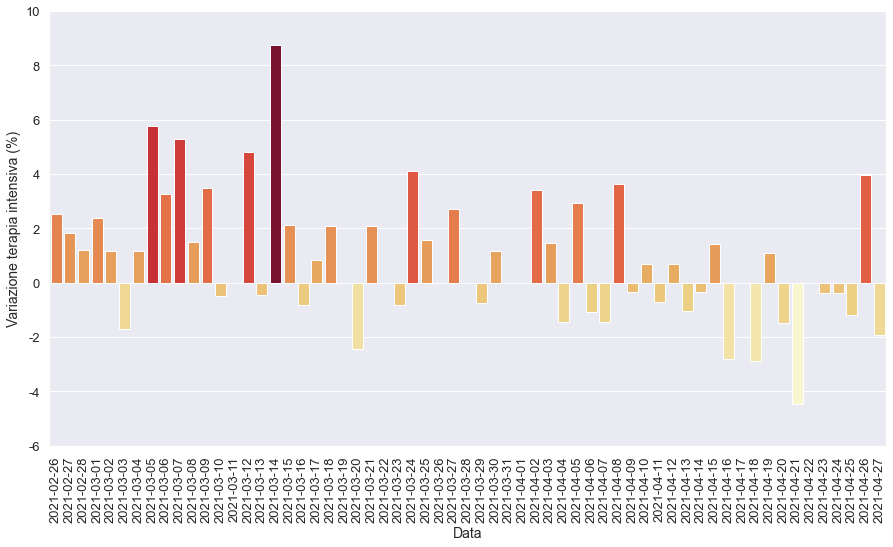

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

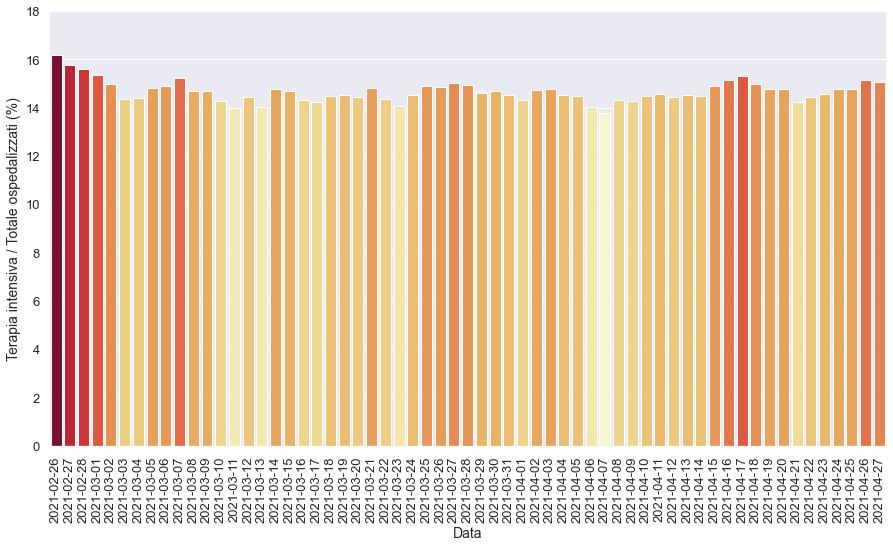

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

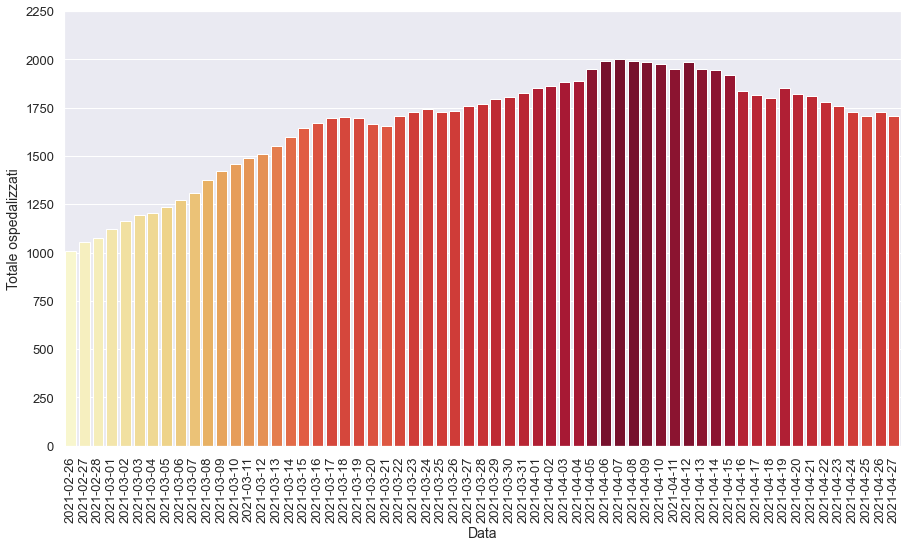

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

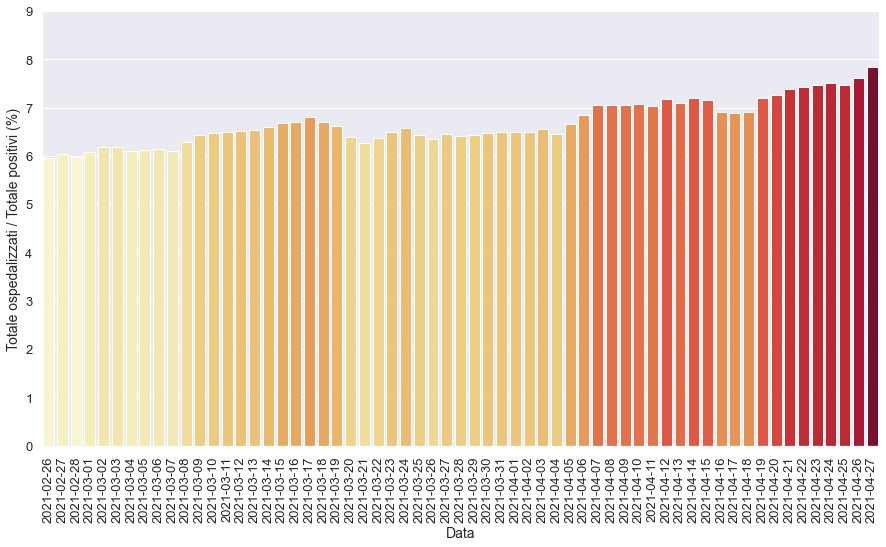

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

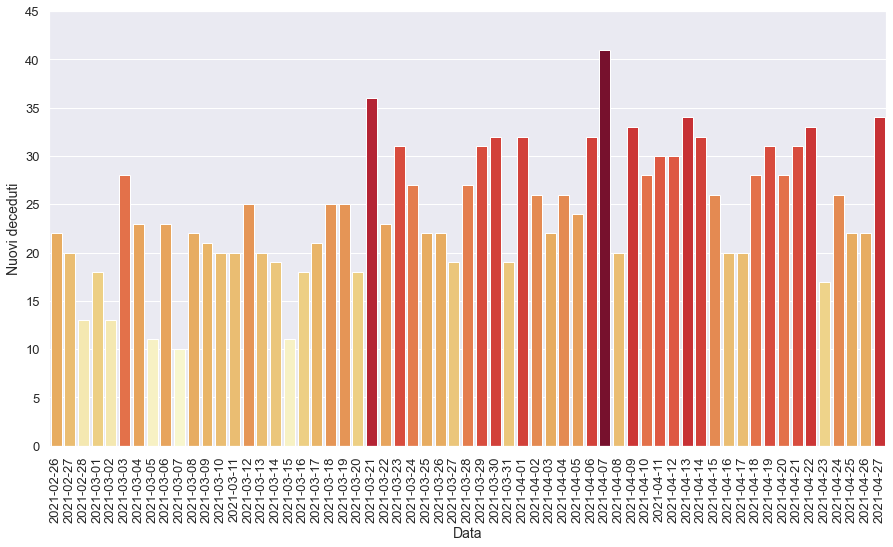

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

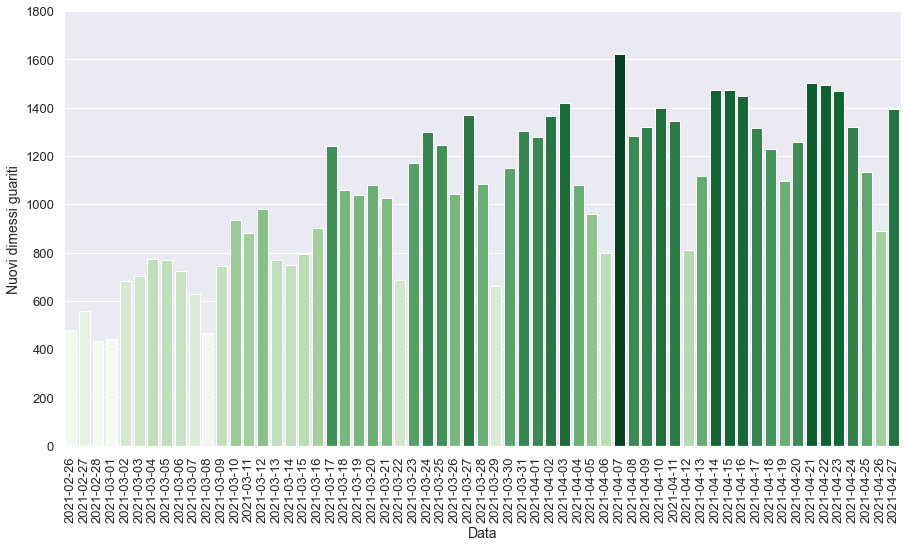

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-28T17:00:00,9,Toscana,1505,264,1769,25792,27561,258,1368,...,27.0,22443.0,9698.0,249.0,14.92,6.42,6.10,14.11,0.00,0.94
1,2021-03-29T17:00:00,9,Toscana,1532,262,1794,26096,27890,329,1021,...,31.0,12087.0,5521.0,304.0,14.60,6.43,8.45,18.49,-0.76,1.19
2,2021-03-30T17:00:00,9,Toscana,1542,265,1807,26083,27890,0,1180,...,32.0,25093.0,8522.0,-13.0,14.67,6.48,4.70,13.85,1.15,0.00
3,2021-03-31T17:00:00,9,Toscana,1560,265,1825,26282,28107,217,1538,...,19.0,29060.0,10281.0,199.0,14.52,6.49,5.29,14.96,0.00,0.78
4,2021-04-01T17:00:00,9,Toscana,1584,265,1849,26579,28428,321,1631,...,32.0,28836.0,11079.0,297.0,14.33,6.50,5.66,14.72,0.00,1.14
5,2021-04-02T17:00:00,9,Toscana,1587,274,1861,26815,28676,248,1640,...,26.0,30467.0,11292.0,236.0,14.72,6.49,5.38,14.52,3.40,0.87
6,2021-04-03T17:00:00,9,Toscana,1603,278,1881,26828,28709,33,1473,...,22.0,30348.0,10300.0,13.0,14.78,6.55,4.85,14.30,1.46,0.12
7,2021-04-04T17:00:00,9,Toscana,1614,274,1888,27340,29228,519,1626,...,26.0,24390.0,8721.0,512.0,14.51,6.46,6.67,18.64,-1.44,1.81
8,2021-04-05T17:00:00,9,Toscana,1666,282,1948,27276,29224,-4,981,...,24.0,10517.0,4470.0,-64.0,14.48,6.67,9.33,21.95,2.92,-0.01
9,2021-04-06T17:00:00,9,Toscana,1712,279,1991,27088,29079,-145,685,...,32.0,8753.0,3178.0,-188.0,14.01,6.85,7.83,21.55,-1.06,-0.50


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

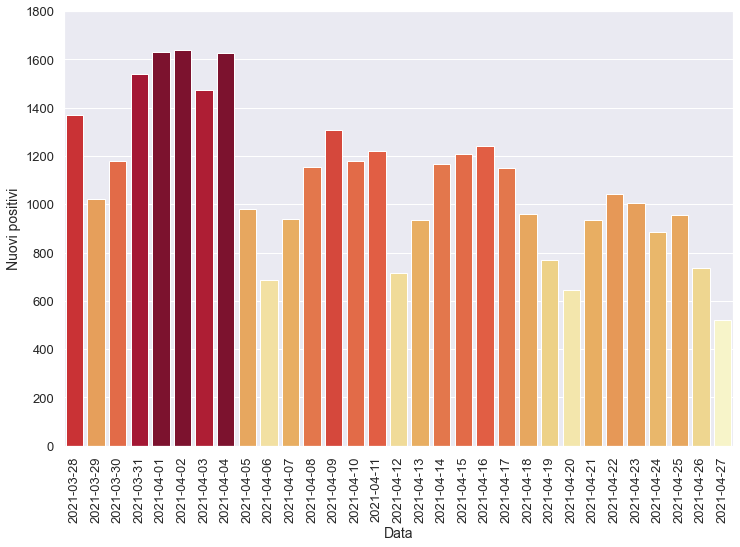

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

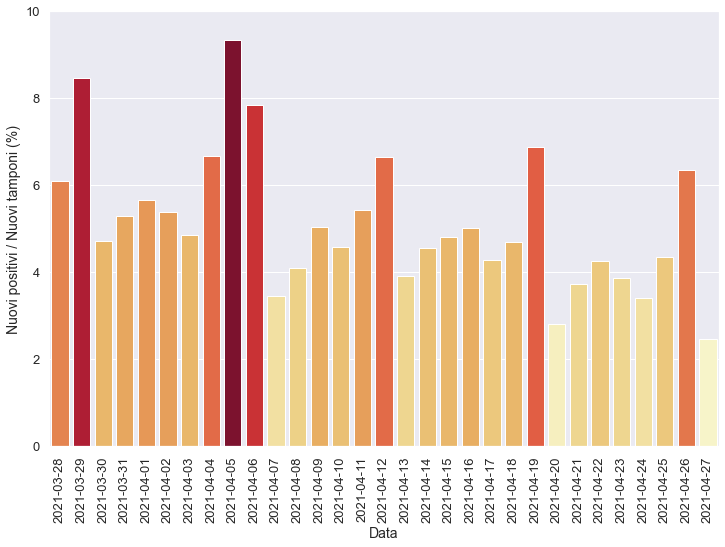

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

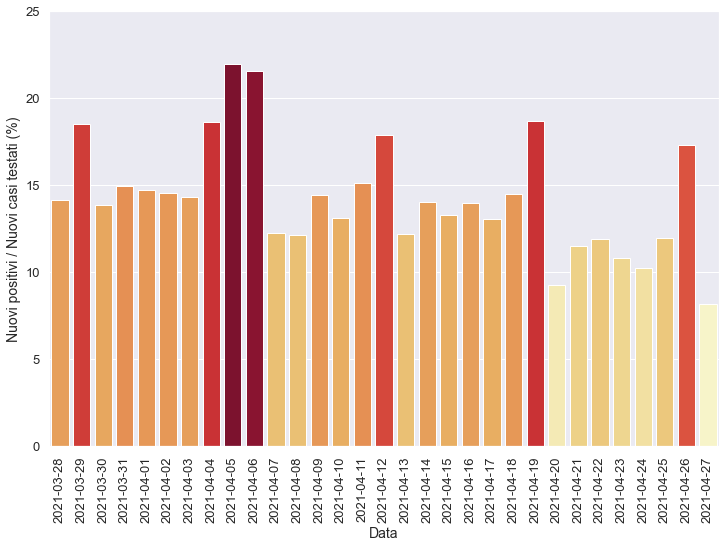

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

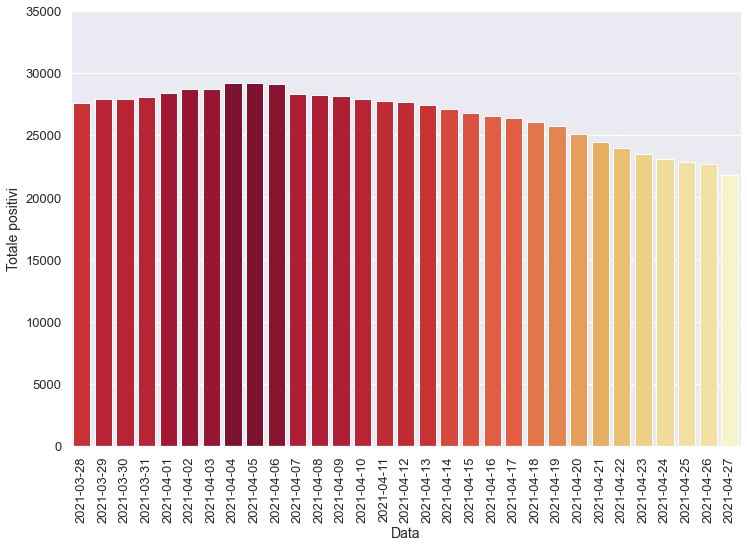

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

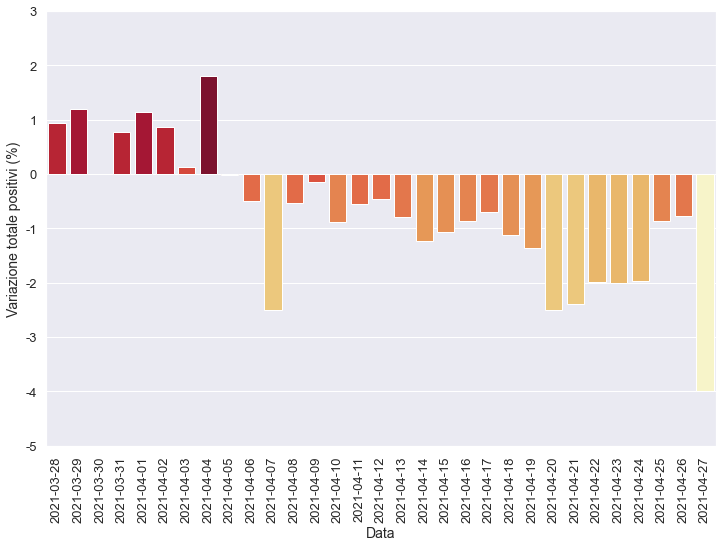

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

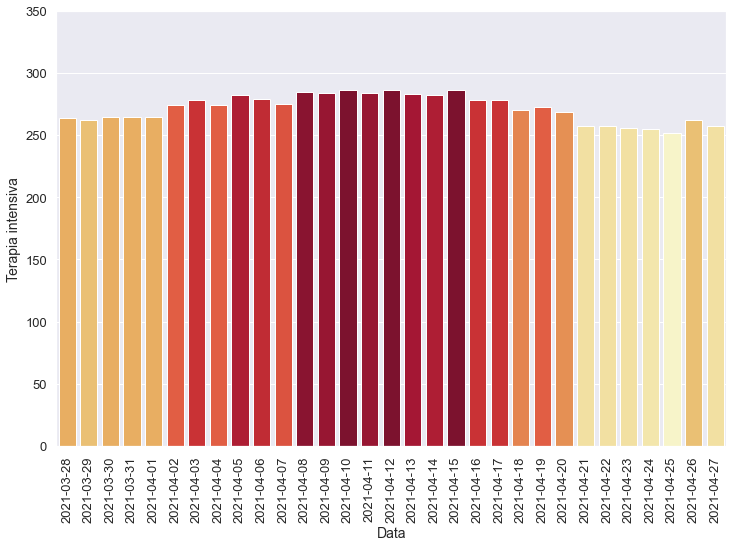

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

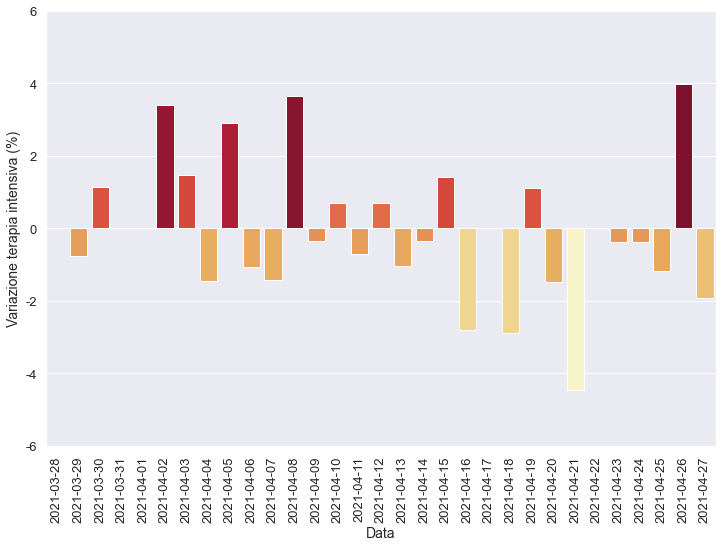

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

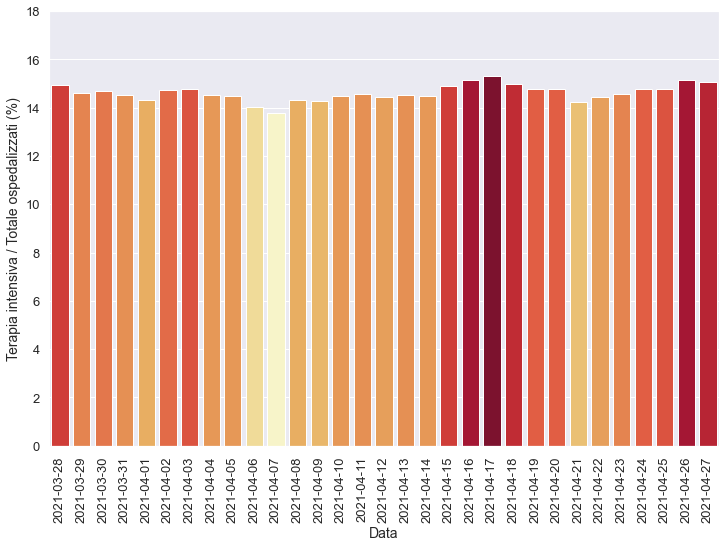

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

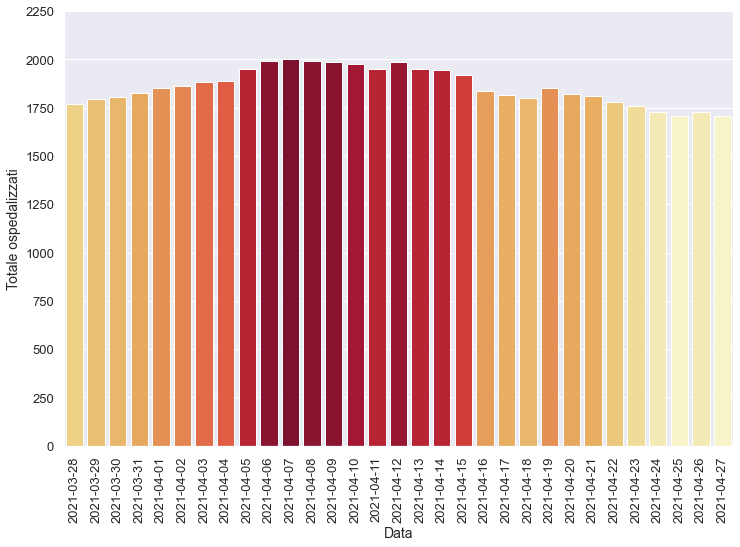

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

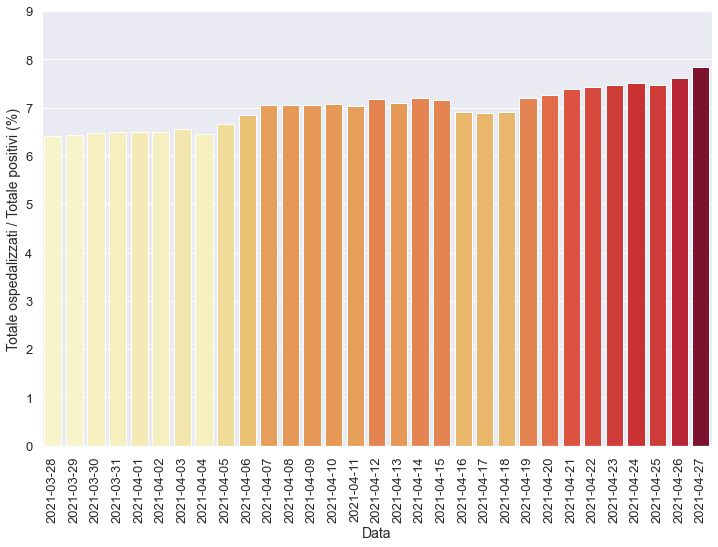

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

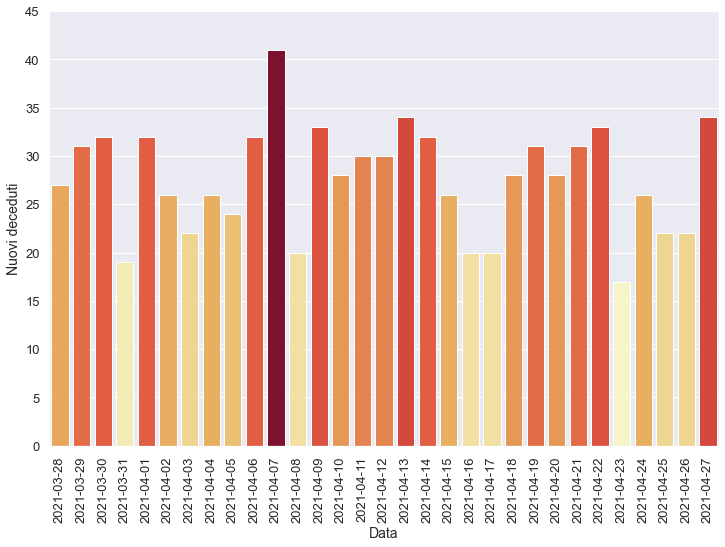

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

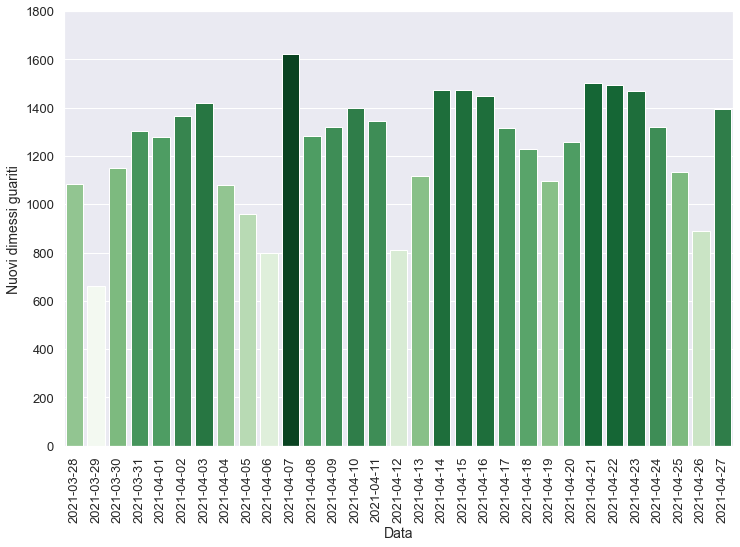

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-20T17:00:00,9,Toscana,1553,269,1822,23249,25071,-642,644,...,28.0,23031.0,6944.0,-614.0,14.76,7.27,2.80,9.27,-1.47,-2.50
1,2021-04-21T17:00:00,9,Toscana,1551,257,1808,22665,24473,-598,936,...,31.0,25175.0,8169.0,-584.0,14.21,7.39,3.72,11.46,-4.46,-2.39
2,2021-04-22T17:00:00,9,Toscana,1524,257,1781,22208,23989,-484,1041,...,33.0,24439.0,8781.0,-457.0,14.43,7.42,4.26,11.86,0.00,-1.98
3,2021-04-23T17:00:00,9,Toscana,1501,256,1757,21750,23507,-482,1003,...,17.0,26049.0,9301.0,-458.0,14.57,7.47,3.85,10.78,-0.39,-2.01
4,2021-04-24T17:00:00,9,Toscana,1474,255,1729,21318,23047,-460,886,...,26.0,26080.0,8671.0,-432.0,14.75,7.50,3.40,10.22,-0.39,-1.96
5,2021-04-25T17:00:00,9,Toscana,1453,252,1705,21141,22846,-201,955,...,22.0,21970.0,7979.0,-177.0,14.78,7.46,4.35,11.97,-1.18,-0.87
6,2021-04-26T17:00:00,9,Toscana,1466,262,1728,20943,22671,-175,737,...,22.0,11609.0,4260.0,-198.0,15.16,7.62,6.35,17.30,3.97,-0.77
7,2021-04-27T17:00:00,9,Toscana,1449,257,1706,20060,21766,-905,522,...,34.0,21193.0,6396.0,-883.0,15.06,7.84,2.46,8.16,-1.91,-3.99


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

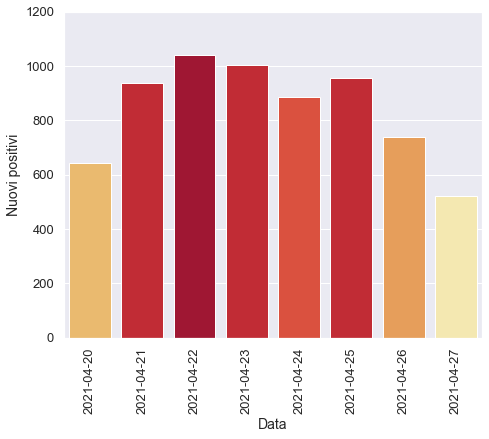

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

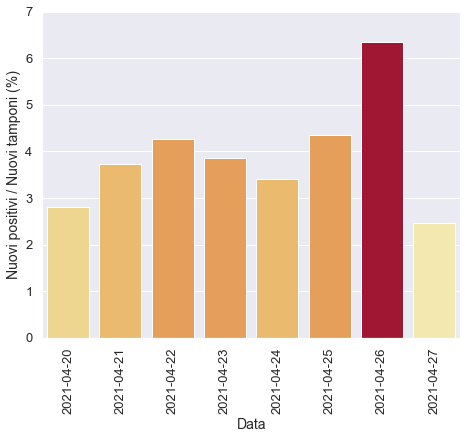

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

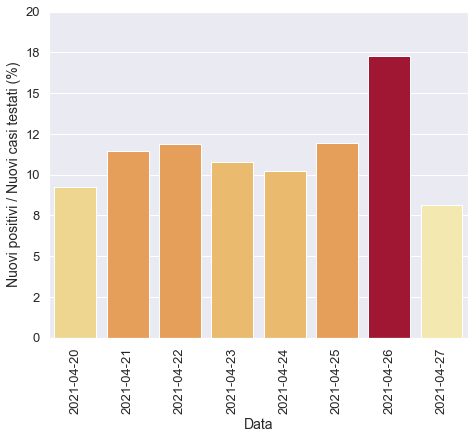

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

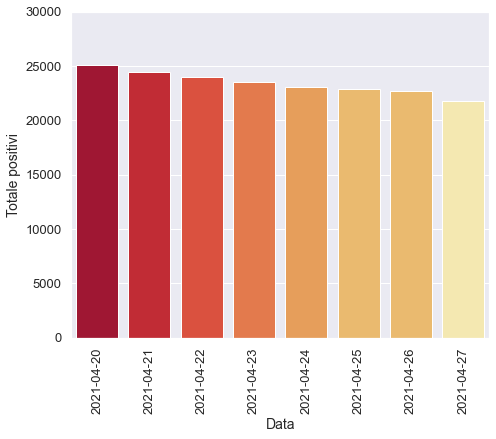

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

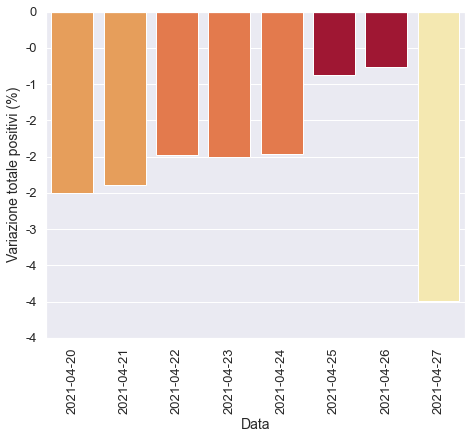

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

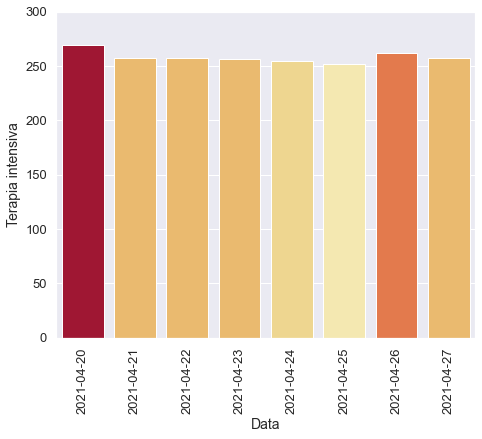

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

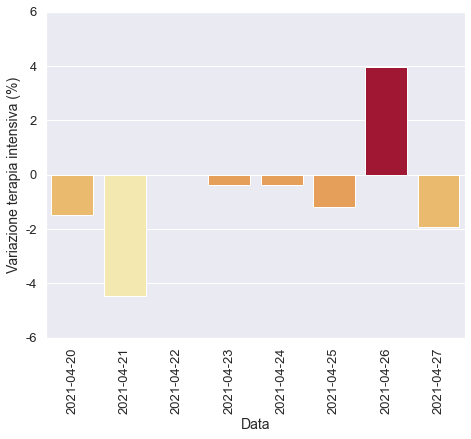

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

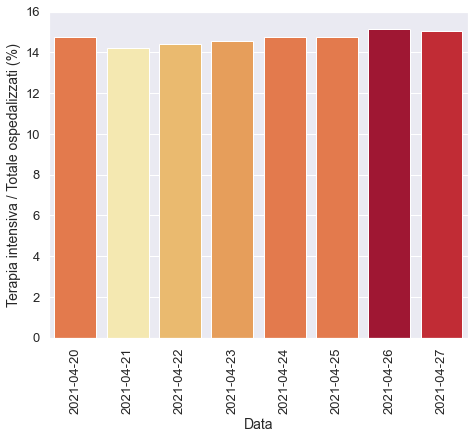

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

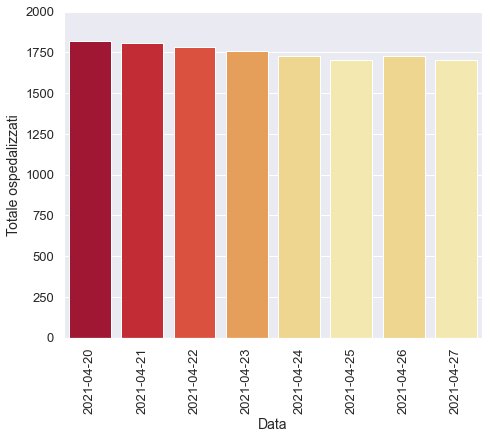

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

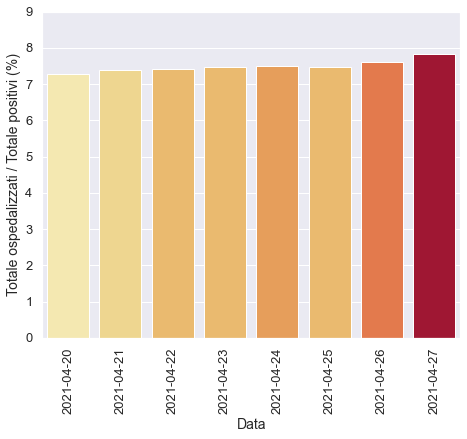

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

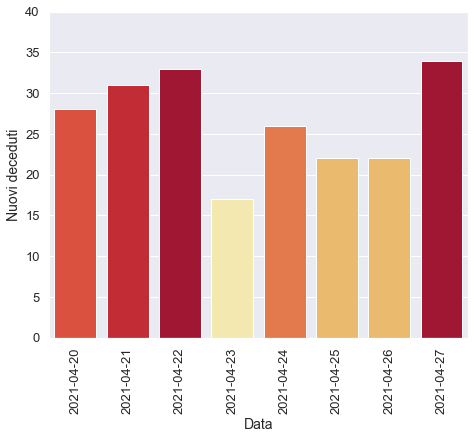

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

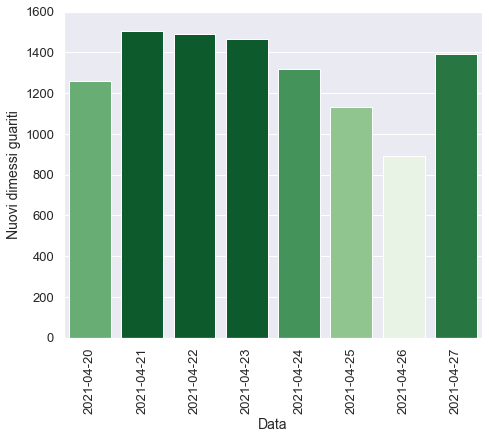

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)